# Problem #
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. 


DATA SET :https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior

# Import Packages

In [53]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

 You can load this data with the `read_csv()` method from `pandas` package. It converts the data set to a python dataframe.

<a id="1"></a><br>
# 1. Gathering Data

In [54]:

loan_train = pd.read_csv('loan-train.csv')
loan_test = pd.read_csv('loan-test.csv')

- Lets display the some few information from our large datasets

Here, We shows the first five rows from datasets

In [55]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


- As we can see in the above output, there are too many columns, ( columns known as features as well. )

We can also use `loan_train` to show few rows from the first five and last five record from the dataset

In [56]:
loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


> ### Here, we can see there are many rows and many columns, To know how many records and columns are available in our dataset, we can use the `shape` attribute or we can use `len()` to know how many records and how many features available in the dataset.

In [57]:
print("Rows: ", len(loan_train))

Rows:  614


Pandas has inbuild attribute to get all column from the dataset, With the help of this feature we can get the how many column available we have.

In [58]:
print("Columns: ", len(loan_train.columns))

Columns:  13


Also we can get the shape of the dataset using `shape` attribute

In [59]:
print("Shape : ", loan_train.shape)

Shape :  (614, 13)


> ### *After we collecting the data, Next step we need to understand what kind of data we have.*

### Also we can get the column as an list(array) from dataset

> **Note: DataFrame.columns returns the total columns of the dataset,
> Store the number of columns in variable `loan_train_columns`**

In [60]:
loan_train_columns = loan_train.columns # assign to a variable
loan_train_columns # print the list of columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Now, Understanding the Data

- First of all we use the `loan_train.describe()` method to shows the important information from the dataset
- It provides the `count`, `mean`, `standard deviation (std)`, `min`, `quartiles` and `max` in its output.

In [61]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### As I said the above cell, this the information of all the methamatical details from dataset. Like `count`, `mean`, `standard deviation (std)`, `min`, `quartiles(25%, 50%, 75%)` and `max`.

> ### Another method is `info()`, This method show us the information about the dataset, Like

1. What's the type of culumn have?
- How many rows available in the dataset?
- What are the features are there?
- How many null values available in the dataset?
- Ans so on...

In [62]:
loan_train.info()
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


As we can see in the output.

1. There are `614` entries
- There are total 13 features (0 to 12)
- There are three types of datatype `dtypes: float64(4), int64(1), object(8)`
- It's Memory usage that is, `memory usage: 62.5+ KB`
- Also, We can check how many missing values available in the `Non-Null Count` column

In [63]:
#Categorical 
data = loan_train.drop(columns=['Loan_ID']) ## Dropping Loan ID
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
print(categorical_columns)

#Numerical Columns
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print(numerical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


<a id="2"></a><br>
# 2. Exploratory Data Analysis

In this section, We learn about extra information about data and it's characteristics.


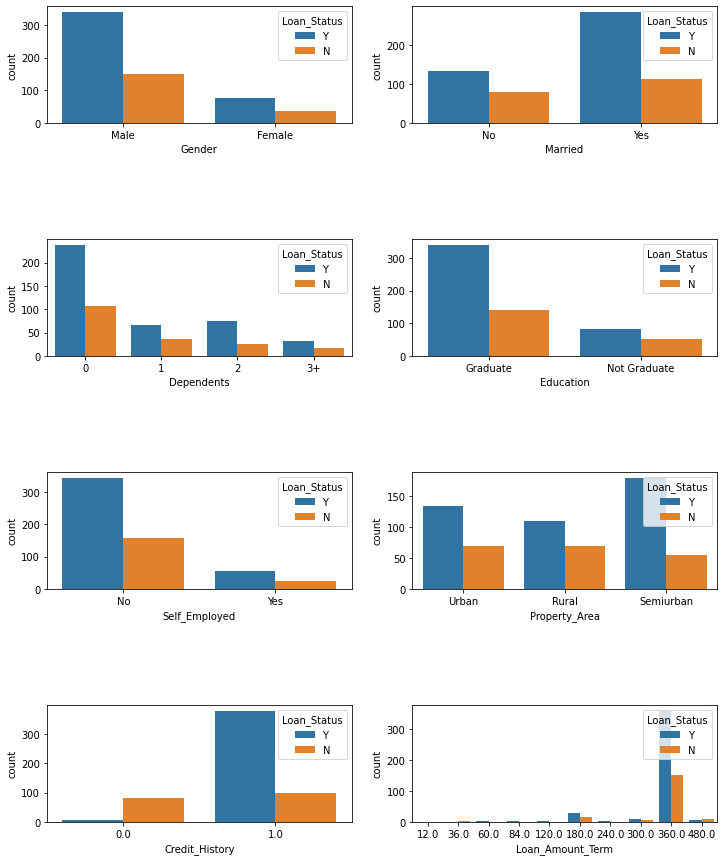

In [64]:
### Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=data,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

 Plots above convey following things about the dataset:
<p>Loan Approval Status: About 2/3rd of applicants have been granted loan.</p>
<p>Gender: There are more Men than Women (approx. 3x)</p>
<p>Martial Status: 2/3rd of the population in the dataset is Marred; Married applicants are more likely to be granted loans.</p>
<p>Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.</p>
<p>Education: About 5/6th of the population is Graduate and graduates have higher propotion of loan approval</p></p>
<p>Employment: 5/6th of population is not self employed.</p>
<p>Property Area: More applicants from Semi-urban and also likely to be granted loans.</p>
<p>Applicant with credit history are far more likely to be accepted.</p>
<p>Loan Amount Term: Majority of the loans taken are for 360 Months (30 years).</p>

- First of all, We explore object type of data
So let's make a function to know how many types of values available in the column

In [65]:
def explore_object_type(df ,feature_name):
    """
    To know, How many values available in object('categorical') type of features
    And Return Categorical values with Count.
    """    
    if df[feature_name].dtype ==  'object':
        print(df[feature_name].value_counts())

- After defined a function, Let's call it. and check what's the output of our created function.

In [66]:
# Now, Test and Call a function for gender only
explore_object_type(loan_train, 'Gender')

Male      489
Female    112
Name: Gender, dtype: int64


- Here's one little issue occurred, Suppose in your datasets there are lots of feature to defined like this above code. 

In [67]:
# Solution is, Do you remember we have variable with name of `loan_train_columns`, Right,  let's use it
# 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'

for featureName in loan_train_columns:
    if loan_train[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(loan_train, str(featureName))


"Loan_ID's" Values with count are :
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

"Gender's" Values with count are :
Male      489
Female    112
Name: Gender, dtype: int64

"Married's" Values with count are :
Yes    398
No     213
Name: Married, dtype: int64

"Dependents's" Values with count are :
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

"Education's" Values with count are :
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

"Self_Employed's" Values with count are :
No     500
Yes     82
Name: Self_Employed, dtype: int64

"Property_Area's" Values with count are :
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

"Loan_Status's" Values with count are :
Y    422
N    192
Name: Loan_Status, dtype: int64



- We need to fill null values with `mean` and `median` using `missingno` package

In [68]:
import missingno as msno

In [69]:
# list of how many percentage values are missing
loan_train

loan_train.isna().sum()
# round((loan_train.isna().sum() / len(loan_train)) * 100, 2)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

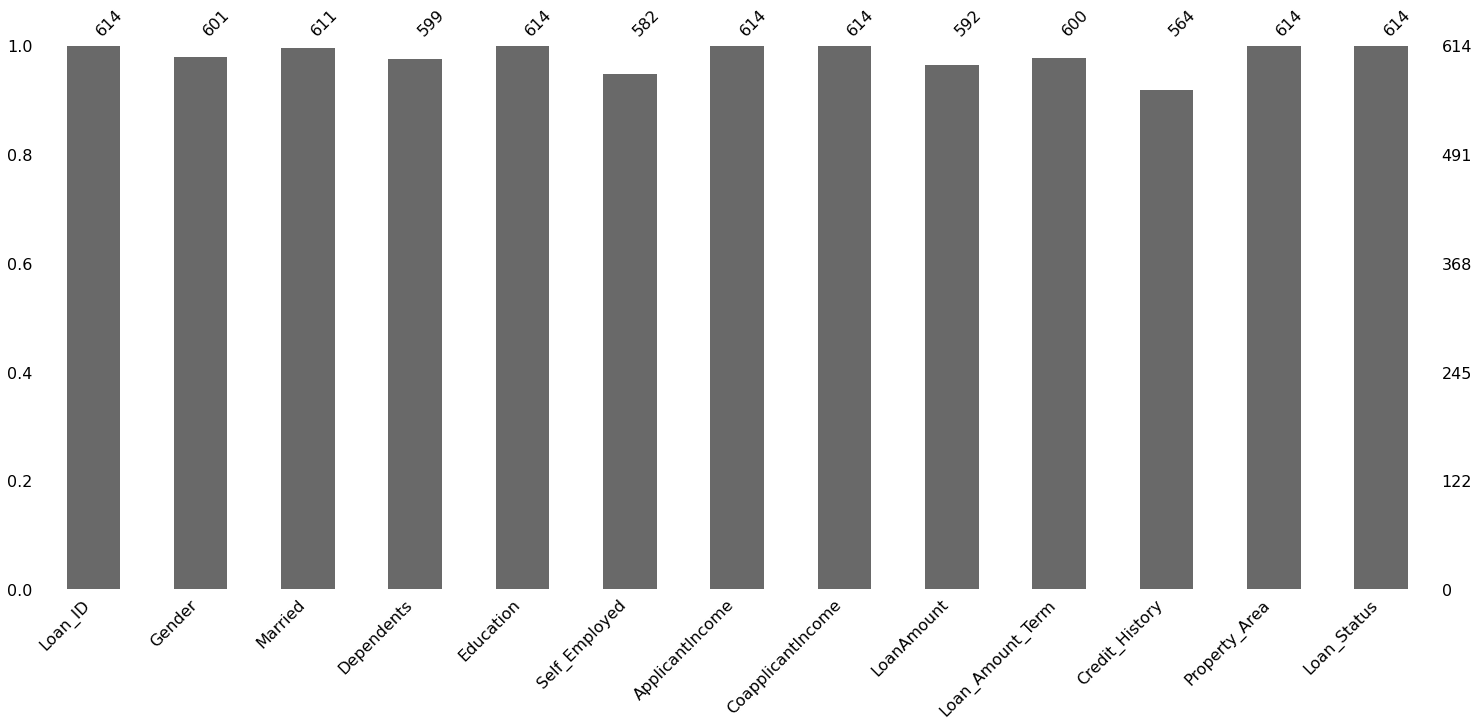

In [70]:
msno.bar(loan_train)

<AxesSubplot:>

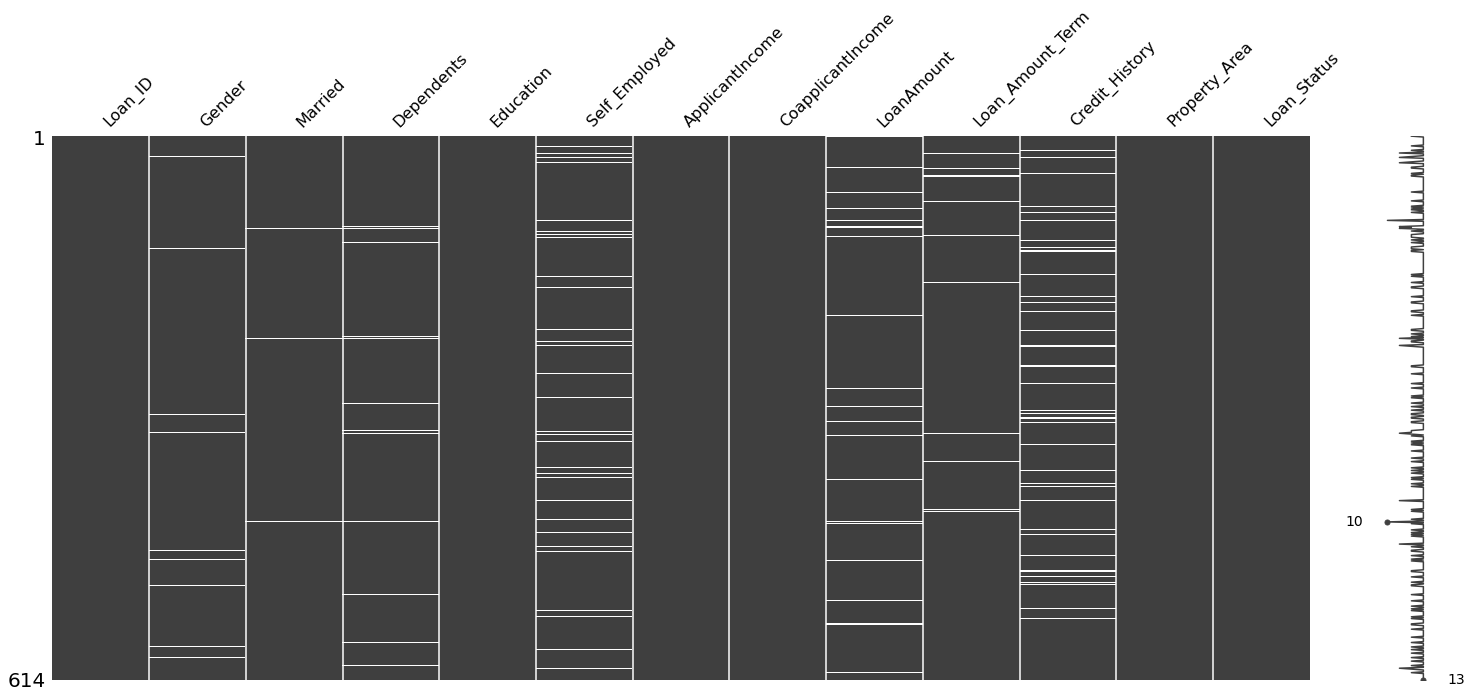

In [71]:
msno.matrix(loan_train )


- As we can see here, there are too many columns missing with small amount of null values so we use `mean` amd `mode` to replace with `NaN` values.

In [72]:
loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode(), inplace=True) # Mode
loan_test['Credit_History'].fillna(loan_test['Credit_History'].mode(), inplace=True) # Mode


loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].mean(), inplace=True) # Mean
loan_test['LoanAmount'].fillna(loan_test['LoanAmount'].mean(), inplace=True) # Mean

### # convert Categorical variable with Numerical values.

`Loan_Status` feature boolean values, So we replace `Y` values with `1` and `N` values with `0`
and same for other `Boolean` types of columns

In [73]:
loan_train.Loan_Status = loan_train.Loan_Status.replace({"Y": 1, "N" : 0})
# loan_test.Loan_Status = loan_test.Loan_Status.replace({"Y": 1, "N" : 0}) 

loan_train.Gender = loan_train.Gender.replace({"Male": 1, "Female" : 0})
loan_test.Gender = loan_test.Gender.replace({"Male": 1, "Female" : 0})

loan_train.Married = loan_train.Married.replace({"Yes": 1, "No" : 0})
loan_test.Married = loan_test.Married.replace({"Yes": 1, "No" : 0})

loan_train.Self_Employed = loan_train.Self_Employed.replace({"Yes": 1, "No" : 0})
loan_test.Self_Employed = loan_test.Self_Employed.replace({"Yes": 1, "No" : 0})


In [74]:

loan_train['Gender'].fillna(loan_train['Gender'].mode()[0], inplace=True)
loan_test['Gender'].fillna(loan_test['Gender'].mode()[0], inplace=True)

loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0], inplace=True)
loan_test['Dependents'].fillna(loan_test['Dependents'].mode()[0], inplace=True)

loan_train['Married'].fillna(loan_train['Married'].mode()[0], inplace=True)
loan_test['Married'].fillna(loan_test['Married'].mode()[0], inplace=True)

loan_train['Credit_History'].fillna(loan_train['Credit_History'].mean(), inplace=True)
loan_test['Credit_History'].fillna(loan_test['Credit_History'].mean(), inplace=True)


* Here, `Property_Area`, `Dependents` and `Education` has multiple values so now we can use `LabelEncoder` from `sklearn` package

In [75]:
from sklearn.preprocessing import LabelEncoder
feature_col = ['Property_Area','Education', 'Dependents']
le = LabelEncoder()
for col in feature_col:
    loan_train[col] = le.fit_transform(loan_train[col])
    loan_test[col] = le.fit_transform(loan_test[col])

> ### Finally, We have all the features with numerical values,

<a id="3"></a><br>
# 3. Data Visualizations


In this section, We are showing the visual information from the dataset, For that we need some pakages that are `matplotlib` and `seaborn`



In [76]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [77]:
loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,0,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,0,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,0,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,1,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,0,0.0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,0,0.0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1.0,1.0,3,0,0.0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1.0,1.0,1,0,0.0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1.0,1.0,2,0,0.0,7583,0.0,187.000000,360.0,1.0,2,1


       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


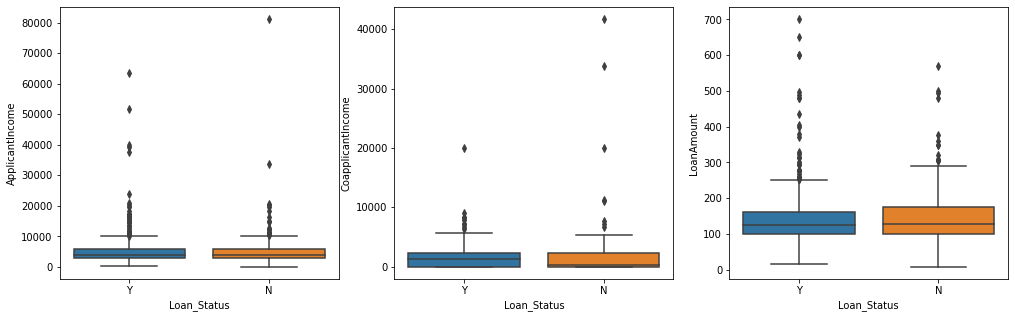

In [78]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=data,x='Loan_Status',ax=axes[idx])

print(data[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

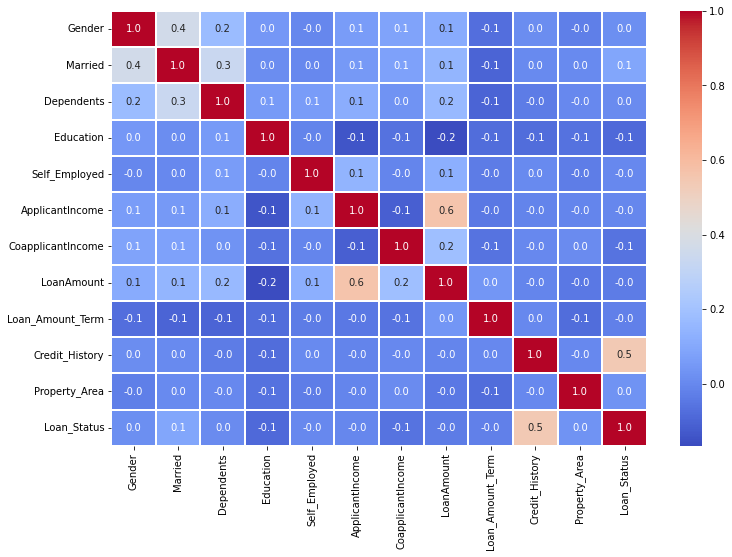

In [79]:
plt.figure(figsize=(12,8))
sns.heatmap(loan_train.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

In this heatmap, we can clearly seen the relation between two variables 

# Data Cleaning
#### - Removing Qutlier
<p>Z Score method</p>

In [80]:
from scipy import stats

num_train = loan_train.select_dtypes(include=["number"])
cat_train = loan_train.select_dtypes(exclude=["number"])
idx = np.all(stats.zscore(num_train) < 3, axis=1)

train_cleaned = pd.concat([num_train.loc[idx], cat_train.loc[idx]], axis=1)


       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


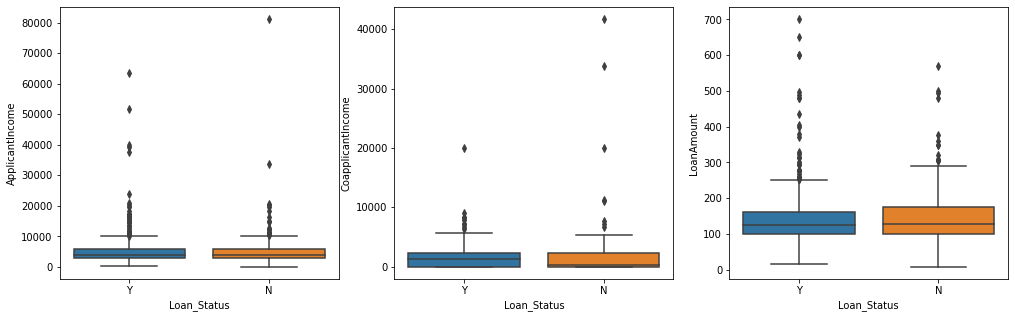

In [81]:
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=data,x='Loan_Status',ax=axes[idx])

print(data[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

 <a id="4"></a><br>
# 4. Choose ML Model.

* In this step, We have a lots of Machine Learning Model from sklearn package, and we need to decide which model is give us the better performance. then we use that model in final stage and send to the production level.

In [82]:
# import ml model from sklearn pacakge

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score


First of all, we are use `LogisticRegression` from `sklearn.linear_model` package. Here is the little information about `LogisticRegression`.

`Logistic Regression` is a **classification algorithm**. It is used to predict a binary outcome (`1 / 0`, `Yes / No`, and `True / False`) given a set of independent variables. To represent binary / categorical outcome, we use dummy variables. You can also think of logistic regression as a special case of linear regression when the outcome variable is categorical, where we are using log of odds as the dependent variable.

![](https://www.analyticsvidhya.com/wp-content/uploads/2015/10/logit.png)

* Let's build the model

In [83]:
logistic_model = LogisticRegression()

<a id="5"></a><br>
# 5. Traing the ML Model

> ### **Before fitting the model, We need to decide how many feature are available for testing and training, then after complete this step. fitt the model** 

Currently, we are using `Credit_History', 'Education', 'Gender` features for training so let's create train and test variables

In [84]:
train_features = ['Credit_History', 'Education', 'Gender']

x_train = loan_train[train_features].values
y_train = loan_train['Loan_Status'].values

x_test = loan_test[train_features].values


In [85]:
logistic_model.fit(x_train, y_train)

LogisticRegression()

<a id="6"></a><br>
# 6. Predict Model

In [86]:
# Predict the model for testin data

predicted = logistic_model.predict(x_test)


In [87]:
# check the coefficeints of the trained model
print('Coefficient of model :', logistic_model.coef_)


Coefficient of model : [[ 3.316164   -0.3059193   0.09398266]]


In [88]:
# check the intercept of the model
print('Intercept of model',logistic_model.intercept_)

Intercept of model [-1.98307795]


In [89]:
# Accuray Score on train dataset
# accuracy_train = accuracy_score(x_test, predicted)
score = logistic_model.score(x_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))


accuracy_score overall : 0.8094462540716613
accuracy_score percent : 80.94


In [90]:

# predict the target on the test dataset
predict_test = logistic_model.predict(x_test)
print('Target on test data',predict_test) 


Target on test data [1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


<a id="7"></a><br>
# 7. Deploy Model


- Finally, we are done so far. The last step is to deploy our model in production map. So we need to export our model and bind with web application API. 

Using pickle we can export our model and store in to `logistic_model.pkl` file, so we can ealy access this file and calculate customize prediction using Web App API.


#### A little bit information about pickle:

`Pickle` is the standard way of serializing objects in Python. You can use the pickle operation to serialize your machine learning algorithms and save the serialized format to a file. Later you can load this file to deserialize your model and use it to make new predictions


In [91]:
import pickle as pkl

In [92]:
# save the model to disk
filename = 'logistic_model.pkl'
pkl.dump(logistic_model, open(filename, 'wb')) # wb means write as binary




### Now, You can check your current directory. You can see the file with named "logistic_model.pkl"

- To read model from file

```
# load the model from disk
loaded_model = pkl.load(open(filename, 'rb')) # rb means read as binary
result = loaded_model.score(X_test, Y_test)

```